# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
units = 'imperial'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
weather_info = pd.DataFrame({"Cities":cities})
weather_info

,Cities
0,rikitea
1,nizhneyansk
2,sentyabrskiy
3,turukhansk
4,bethel
...,...
608,bom jesus
609,mandiana
610,ishinomaki
611,finnsnes


In [6]:
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
city_num = 0
city_num_list = []
city_used = []
for city in weather_info['Cities']:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_used.append(city)
        city_num = city_num + 1
        print(city_num, city)
        city_num_list.append(city_num)
    except KeyError:
        print('city not found')
  


1 rikitea
city not found
city not found
2 turukhansk
3 bethel
4 dikson
5 busselton
6 ushuaia
7 shamary
8 jalu
9 hay river
10 tasiilaq
11 hilo
12 cuenca
13 qaqortoq
14 san jose
15 sile
16 kigonsera
17 rakai
city not found
18 constitucion
19 ponta do sol
20 provideniya
21 bluff
22 tonj
23 hermanus
24 kodiak
25 ribeira grande
26 mendi
27 ushtobe
28 yellowknife
29 burnie
30 albany
31 lomovka
32 severo-kurilsk
33 kaili
34 jamestown
city not found
35 punta arenas
36 bac lieu
37 daru
38 salalah
39 esperance
40 east london
41 ancud
42 nome
43 parauna
city not found
city not found
44 vaini
45 kieta
46 tigil
47 necochea
48 tuktoyaktuk
49 mar del plata
50 barrow
51 husavik
52 guerrero negro
53 port elizabeth
54 hofn
55 boa vista
city not found
56 georgetown
57 laguna
58 rafai
59 chukhloma
60 great yarmouth
61 castro
62 kloulklubed
63 kaitangata
city not found
64 havre-saint-pierre
65 lavumisa
66 puerto ayora
city not found
67 muros
68 marfino
69 ostrovnoy
70 olafsvik
71 mataura
72 kyabe
73 port a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame({'City':city_used, 'Latitude':lat, 'Longitude':lng, 'Temperature (F)':temp, 'Humidity (%)':humidity,
                          'Cloudiness (%)':cloudiness, 'Wind Speed (MPH)':wind})
weather_df

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,rikitea,-23.12,-134.97,78.66,75,0,13.69
1,turukhansk,65.82,87.98,16.81,94,100,9.73
2,bethel,41.37,-73.41,36.10,47,1,4.70
3,dikson,73.51,80.55,-3.84,96,100,9.04
4,busselton,-33.65,115.33,75.87,37,29,11.68
...,...,...,...,...,...,...,...
548,bom jesus,-9.07,-44.36,74.25,82,94,2.13
549,mandiana,10.63,-8.68,70.03,13,81,5.01
550,ishinomaki,38.42,141.30,39.20,41,20,9.17
551,finnsnes,69.23,17.98,24.94,85,90,17.22


In [9]:
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [5]:
weather_df = pd.read_csv(output_data_file)

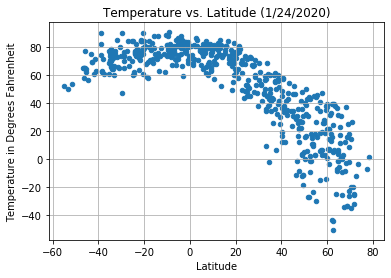

In [6]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Temperature (F)', marker = 'o')
plt.title('Temperature vs. Latitude (1/24/2020)')
plt.ylabel('Temperature in Degrees Fahrenheit')
plt.grid()

#### Latitude vs. Humidity Plot

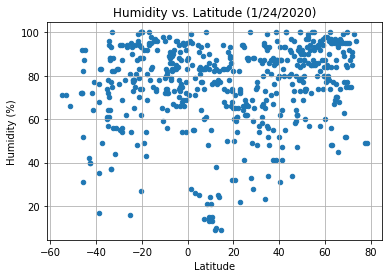

In [7]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Humidity (%)', marker = 'o')
plt.title('Humidity vs. Latitude (1/24/2020)')
plt.ylabel('Humidity (%)')
plt.grid()

#### Latitude vs. Cloudiness Plot

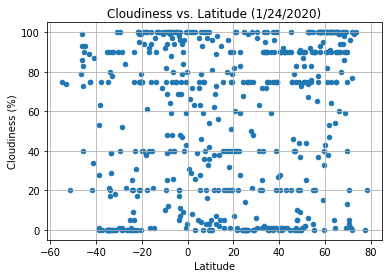

In [8]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Cloudiness (%)', marker = 'o')
plt.title('Cloudiness vs. Latitude (1/24/2020)')
plt.ylabel('Cloudiness (%)')
plt.grid()

#### Latitude vs. Wind Speed Plot

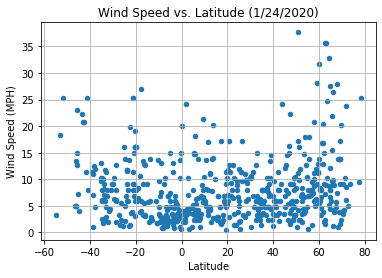

In [9]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Wind Speed (MPH)', marker = 'o')
plt.title('Wind Speed vs. Latitude (1/24/2020)')
plt.ylabel('Wind Speed (MPH)')
plt.grid()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def north_regression(y_variable):
    x_values = north_weather['Latitude']
    y_values = north_weather[y_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    north_weather.plot(kind = 'scatter', x = 'Latitude', y = y_variable, marker = 'o')
    plt.title(y_variable +' vs. Latitude (1/24/2020)')
    plt.ylabel(y_variable)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.grid()
    plt.plot(x_values, regress_values,"r-")
    print(f"R-value equals {str(rvalue)}")
    print(line_eq)
    
def south_regression(y_variable):
    x_values = south_weather['Latitude']
    y_values = south_weather[y_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    south_weather.plot(kind = 'scatter', x = 'Latitude', y = y_variable, marker = 'o')
    plt.title(y_variable +' vs. Latitude (1/24/2020)')
    plt.ylabel(y_variable)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.grid()
    plt.plot(x_values, regress_values,"r-")
    print(f"R-value equals {str(rvalue)}")
    print(line_eq)



In [11]:
# Create Northern and Southern Hemisphere DataFrames
north_weather = weather_df.loc[weather_df['Latitude']>0]
south_weather = weather_df.loc[weather_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value equals -0.8513573422142369
y = -1.3x + 88.65


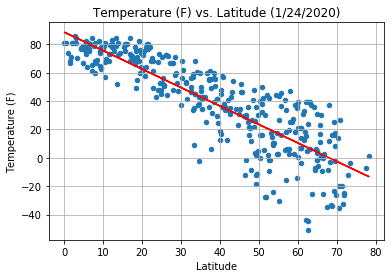

In [12]:
north_regression('Temperature (F)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value equals 0.4978011336030147
y = 0.3x + 80.3


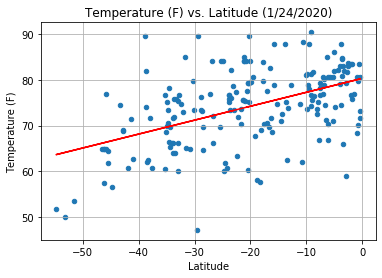

In [13]:
south_regression('Temperature (F)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value equals 0.33876984108284686
y = 0.33x + 62.19


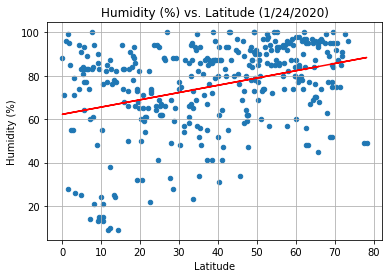

In [14]:
north_regression('Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value equals 0.281433302058048
y = 0.35x + 83.98


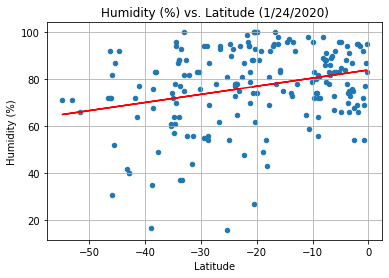

In [15]:
south_regression('Humidity (%)')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value equals 0.2363565975601001
y = 0.43x + 38.73


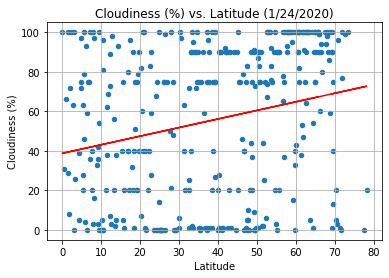

In [16]:
north_regression('Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value equals 0.19823323598780382
y = 0.54x + 65.95


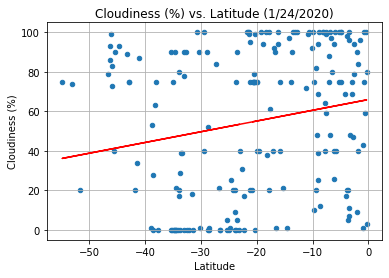

In [17]:
south_regression('Cloudiness (%)')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value equals 0.22540558273225342
y = 0.07x + 5.62


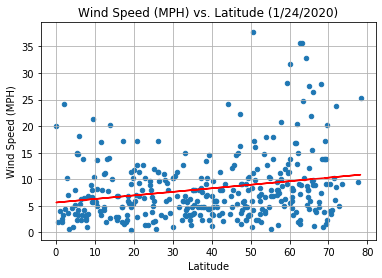

In [18]:
north_regression('Wind Speed (MPH)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value equals -0.3534083410386898
y = -0.15x + 4.51


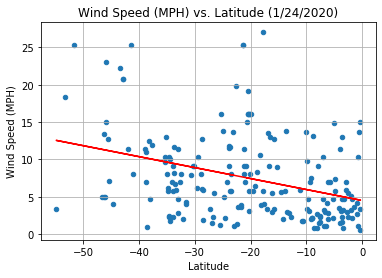

In [19]:
south_regression('Wind Speed (MPH)')